<a href="https://colab.research.google.com/github/udghosh/HRC_Projects/blob/main/Thanos_1805174_ML_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

THANOS
UDAY BHANU GHOSH :- 1805174

---

---





In [ ]:
# Mounting The Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing Essential Libraries And Functions
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
# importing Warnings To remove Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Reading the CSV file
df = pd.read_csv('/content/drive/MyDrive/1805174.csv')
df.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200707822,PUBLI in,2019-04-15 00:00:00,2019.0,1.929060e+09,2019-03-31,20190331,20190331,20190415.0,USD,RV,1.0,NaN,145752.58,20190331.0,NAA8,1.929060e+09,0
1,U001,200769623,WAL-MAR corp,2019-04-09 00:00:00,2019.0,1.929053e+09,2019-03-30,20190329,20190330,20190414.0,USD,RV,1.0,NaN,2480.03,20190330.0,NAH4,1.929053e+09,0
2,U001,0200555117,BURR co,2019-10-10 00:00:00,2019.0,1.929896e+09,2019-09-25,20190918,20190925,20191129.0,USD,RV,1.0,NaN,7257.40,20190925.0,NAGD,1.929896e+09,0
3,U001,0200794332,COST co,2019-04-30 00:00:00,2019.0,1.929147e+09,2019-04-16,20190415,20190416,20190620.0,USD,RV,1.0,NaN,26657.43,20190416.0,NAGD,1.929147e+09,0
4,U001,0100031704,DELHAIZE in,2019-05-14 00:00:00,2019.0,1.929220e+09,2019-04-29,20190427,20190429,20190514.0,USD,RV,1.0,NaN,16119.49,20190429.0,NAA8,1.929220e+09,0


Basic PRE-PROCESSING

---

---





In [ ]:
# Changing integer to date and time Format

df['clear_date'] = pd.to_datetime(df['clear_date'])
df['document_create_date.1'] = pd.to_datetime(df['document_create_date.1'], format="%Y%m%d")
df['posting_date'] = pd.to_datetime(df['posting_date'])
df['due_in_date'] = pd.to_datetime(df['due_in_date'], format="%Y%m%d")
df['document_create_date'] = pd.to_datetime(df['document_create_date'], format="%Y%m%d")
df['baseline_create_date'] = pd.to_datetime(df['baseline_create_date'], format="%Y%m%d")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   business_code           50000 non-null  object        
 1   cust_number             50000 non-null  object        
 2   name_customer           50000 non-null  object        
 3   clear_date              45381 non-null  datetime64[ns]
 4   buisness_year           50000 non-null  float64       
 5   doc_id                  50000 non-null  float64       
 6   posting_date            50000 non-null  datetime64[ns]
 7   document_create_date    50000 non-null  datetime64[ns]
 8   document_create_date.1  50000 non-null  datetime64[ns]
 9   due_in_date             50000 non-null  datetime64[ns]
 10  invoice_currency        50000 non-null  object        
 11  document type           50000 non-null  object        
 12  posting_id              50000 non-null  float6

In [ ]:
# Rearranging the columns to ease the use of it
df = df[['buisness_year', 'doc_id', 'posting_id', 'area_business','total_open_amount', 'invoice_id', 'isOpen', 'business_code', 'cust_number', 'name_customer', 'invoice_currency', 'document type', 'cust_payment_terms', 'clear_date', 'posting_date', 'document_create_date', 'document_create_date.1', 'due_in_date', 'baseline_create_date']]

In [ ]:
# Dropping Area Bussiness column because it is empty
df.drop(['area_business'],inplace=True,axis=1)


**Splitting the data according to the given requirements**

---




In [ ]:
# To disable Scrolling

from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 100000})'''))

# Sorting The values in accordance with document create date

df.sort_values('document_create_date.1',inplace = True)
df.head(50)

<IPython.core.display.Javascript object>

,buisness_year,doc_id,posting_id,total_open_amount,invoice_id,isOpen,business_code,cust_number,name_customer,invoice_currency,document type,cust_payment_terms,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,baseline_create_date
27794,2019.0,1.928540e+09,1.0,222.74,1.928540e+09,0,U001,0200769623,WAL-MAR us,USD,RV,NAH4,2019-01-10,2018-12-30,2018-12-29,2018-12-30,2019-01-14,2018-12-30
11418,2019.0,1.928508e+09,1.0,9398.57,1.928508e+09,0,U001,0100000217,MRS S associates,USD,RV,NAA8,2019-01-12,2018-12-30,2018-12-31,2018-12-30,2019-01-14,2018-12-30
24215,2019.0,1.928545e+09,1.0,17707.30,1.928545e+09,0,U001,0200769623,WAL-MAR foundation,USD,RV,NAH4,2019-01-11,2018-12-30,2018-12-30,2018-12-30,2019-01-14,2018-12-30
9514,2019.0,1.928542e+09,1.0,22221.15,1.928542e+09,0,U001,0200769623,WAL-MAR associates,USD,RV,NAH4,2019-01-10,2018-12-30,2018-12-29,2018-12-30,2019-01-14,2018-12-30
45305,2019.0,1.928533e+09,1.0,35118.85,1.928533e+09,0,U001,0200418007,AM us,USD,RV,NAA8,2019-01-22,2018-12-30,2018-12-29,2018-12-30,2019-01-14,2018-12-30
1653,2019.0,1.928538e+09,1.0,240.86,1.928538e+09,0,U001,0200726979,BJ'S llc,USD,RV,NAA8,2019-01-15,2018-12-30,2018-12-29,2018-12-30,2019-01-14,2018-12-30
22406,2019.0,1.928542e+09,1.0,20417.83,1.928542e+09,0,U001,0200769623,WAL-MAR in,USD,RV,NAH4,2019-01-09,2018-12-30,2018-12-29,2018-12-30,2019-01-14,2018-12-30
36270,2019.0,1.991820e+09,1.0,28225.48,1.991820e+09,0,U013,0100009932,SYSCO IN trust,USD,RV,NAVE,2019-02-28,2018-12-30,2018-12-28,2018-12-30,2019-01-29,2018-12-30
41023,2019.0,1.928541e+09,1.0,69150.24,1.928541e+09,0,U001,0200704045,RA,USD,RV,NAA8,2019-01-14,2018-12-30,2018-12-30,2018-12-30,2019-01-14,2018-12-30
39223,2019.0,1.928540e+09,1.0,11782.60,1.928540e+09,0,U001,0200744019,TARG corp,USD,RV,NAA8,2019-01-18,2018-12-30,2018-12-29,2018-12-30,2019-01-14,2018-12-30


In [ ]:
# creating test data
test = df[df['clear_date'].isnull() == True]
# Creating train data
train = df[df['clear_date'].isnull() == False]
# Creating validation set 1 and 2
train, val1 = train_test_split(train , test_size=.15,shuffle=False)
train, val2 = train_test_split(train , test_size=.15,shuffle=False)

In [ ]:
print(test)
print(train)
print(val1)
print(val1)

       buisness_year        doc_id  ...  due_in_date  baseline_create_date
48205         2020.0  1.930576e+09  ...   2020-05-02            2020-02-27
48239         2020.0  2.960617e+09  ...   2020-03-09            2020-02-28
49705         2020.0  1.930578e+09  ...   2020-03-13            2020-02-27
48196         2020.0  1.930567e+09  ...   2020-04-27            2020-02-27
49740         2020.0  1.930571e+09  ...   2020-03-13            2020-02-27
...              ...           ...  ...          ...                   ...
49316         2020.0  2.960635e+09  ...   2020-05-24            2020-05-14
49884         2020.0  1.930907e+09  ...   2020-06-02            2020-05-18
47330         2020.0  1.930915e+09  ...   2020-06-03            2020-05-19
46022         2020.0  1.930926e+09  ...   2020-06-20            2020-05-21
47276         2020.0  1.930934e+09  ...   2020-06-01            2020-05-22

[4619 rows x 18 columns]
       buisness_year        doc_id  ...  due_in_date  baseline_create_date

In [ ]:
def target_column(data):
    data['delay'] = data['clear_date'] - data['due_in_date']
    data.delay =  data.delay.dt.days


In [ ]:
# Creating Target columns in test and validation set

target_column(train)
target_column(val1)
target_column(val2)


In [ ]:
train

,buisness_year,doc_id,posting_id,total_open_amount,invoice_id,isOpen,business_code,cust_number,name_customer,invoice_currency,document type,cust_payment_terms,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,baseline_create_date,delay
27794,2019.0,1.928540e+09,1.0,222.74,1.928540e+09,0,U001,0200769623,WAL-MAR us,USD,RV,NAH4,2019-01-10,2018-12-30,2018-12-29,2018-12-30,2019-01-14,2018-12-30,-4
11418,2019.0,1.928508e+09,1.0,9398.57,1.928508e+09,0,U001,0100000217,MRS S associates,USD,RV,NAA8,2019-01-12,2018-12-30,2018-12-31,2018-12-30,2019-01-14,2018-12-30,-2
24215,2019.0,1.928545e+09,1.0,17707.30,1.928545e+09,0,U001,0200769623,WAL-MAR foundation,USD,RV,NAH4,2019-01-11,2018-12-30,2018-12-30,2018-12-30,2019-01-14,2018-12-30,-3
9514,2019.0,1.928542e+09,1.0,22221.15,1.928542e+09,0,U001,0200769623,WAL-MAR associates,USD,RV,NAH4,2019-01-10,2018-12-30,2018-12-29,2018-12-30,2019-01-14,2018-12-30,-4
45305,2019.0,1.928533e+09,1.0,35118.85,1.928533e+09,0,U001,0200418007,AM us,USD,RV,NAA8,2019-01-22,2018-12-30,2018-12-29,2018-12-30,2019-01-14,2018-12-30,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35207,2019.0,1.930028e+09,1.0,6780.20,1.930028e+09,0,U001,0200780849,LAUREL,USD,RV,NAWU,2019-11-27,2019-10-18,2019-10-18,2019-10-18,2019-11-27,2019-10-18,0
13656,2019.0,1.930028e+09,1.0,18771.48,1.930028e+09,0,U001,0200762301,C&S WH foundation,USD,RV,NAC6,2019-11-04,2019-10-18,2019-10-18,2019-10-18,2019-11-02,2019-10-18,2
22022,2019.0,1.930022e+09,1.0,2835.34,1.930022e+09,0,U001,0200353024,DECA,USD,RV,NAM4,2019-11-01,2019-10-18,2019-10-18,2019-10-18,2019-11-08,2019-10-16,-7
12675,2019.0,1.929996e+09,1.0,23095.93,1.929996e+09,0,U001,0200778870,C associates,USD,RV,NAA8,2019-11-22,2019-10-18,2019-10-10,2019-10-18,2019-11-02,2019-10-18,20


In [ ]:
# Checking of not null columns

train.isnull().sum()

buisness_year             0
doc_id                    0
posting_id                0
total_open_amount         0
invoice_id                4
isOpen                    0
business_code             0
cust_number               0
name_customer             0
invoice_currency          0
document type             0
cust_payment_terms        0
clear_date                0
posting_date              0
document_create_date      0
document_create_date.1    0
due_in_date               0
baseline_create_date      0
delay                     0
dtype: int64

In [ ]:
len(train)

32787

In [ ]:
# Dropping Invoice ID that has Null values

train.dropna(axis=0, how='any', inplace = True)

In [ ]:
len(train)

32783

In [ ]:
train.head(5)

,buisness_year,doc_id,posting_id,total_open_amount,invoice_id,isOpen,business_code,cust_number,name_customer,invoice_currency,document type,cust_payment_terms,clear_date,posting_date,document_create_date,document_create_date.1,due_in_date,baseline_create_date,delay
27794,2019.0,1.928540e+09,1.0,222.74,1.928540e+09,0,U001,0200769623,WAL-MAR us,USD,RV,NAH4,2019-01-10,2018-12-30,2018-12-29,2018-12-30,2019-01-14,2018-12-30,-4
11418,2019.0,1.928508e+09,1.0,9398.57,1.928508e+09,0,U001,0100000217,MRS S associates,USD,RV,NAA8,2019-01-12,2018-12-30,2018-12-31,2018-12-30,2019-01-14,2018-12-30,-2
24215,2019.0,1.928545e+09,1.0,17707.30,1.928545e+09,0,U001,0200769623,WAL-MAR foundation,USD,RV,NAH4,2019-01-11,2018-12-30,2018-12-30,2018-12-30,2019-01-14,2018-12-30,-3
9514,2019.0,1.928542e+09,1.0,22221.15,1.928542e+09,0,U001,0200769623,WAL-MAR associates,USD,RV,NAH4,2019-01-10,2018-12-30,2018-12-29,2018-12-30,2019-01-14,2018-12-30,-4
45305,2019.0,1.928533e+09,1.0,35118.85,1.928533e+09,0,U001,0200418007,AM us,USD,RV,NAA8,2019-01-22,2018-12-30,2018-12-29,2018-12-30,2019-01-14,2018-12-30,8


EDA (Exploratory Data Analysis)

---

---





In [ ]:
# comparing columns for Equality and Then Dropping it

compare = np.where(train["document_create_date"] == train["document_create_date.1"], True, False)
train["equal"] = compare


In [ ]:
# Counting the True and False Values

train["equal"].value_counts()

False    18974
True     13809
Name: equal, dtype: int64

In [ ]:
# Dropping Columns that are not needed

train.drop(['equal'],inplace=True,axis=1)

In [ ]:
train["buisness_year"].value_counts()

2019.0    32783
Name: buisness_year, dtype: int64

In [ ]:
train["doc_id"].value_counts()
# no inferenece can be drawn from it every document has a unique doc id

1.929488e+09    1
1.928615e+09    1
1.929938e+09    1
1.928729e+09    1
1.929613e+09    1
               ..
1.929670e+09    1
1.929878e+09    1
1.929320e+09    1
1.928985e+09    1
1.929360e+09    1
Name: doc_id, Length: 32783, dtype: int64

In [ ]:
train["posting_id"].value_counts()

1.0    32783
Name: posting_id, dtype: int64

In [ ]:
train["invoice_id"].value_counts()

1.929488e+09    1
1.928615e+09    1
1.929938e+09    1
1.928729e+09    1
1.929613e+09    1
               ..
1.929670e+09    1
1.929878e+09    1
1.929320e+09    1
1.928985e+09    1
1.929360e+09    1
Name: invoice_id, Length: 32783, dtype: int64

In [ ]:
train["business_code"].value_counts()

U001    29571
CA02     2609
U013      482
U002      110
U005       10
U007        1
Name: business_code, dtype: int64

In [ ]:
val1["business_code"].value_counts()

U001    6204
CA02     493
U013      86
U002      21
U005       4
Name: business_code, dtype: int64

In [ ]:
train["cust_number"].value_counts()

0200769623    6926
0200726979    1144
0200762301     926
0200759878     818
200769623      735
              ... 
0100046476       1
100010265        1
200770567        1
0200731119       1
100012991        1
Name: cust_number, Length: 1284, dtype: int64

In [ ]:
train["name_customer"].value_counts()

WAL-MAR associates    760
WAL-MAR trust         728
WAL-MAR co            707
WAL-MAR in            705
WAL-MAR llc           690
                     ... 
O associates            1
POCON foundation        1
TAJI trust              1
U R M  in               1
G &                     1
Name: name_customer, Length: 3647, dtype: int64

In [ ]:
train["invoice_currency"].value_counts()

USD    30173
CAD     2610
Name: invoice_currency, dtype: int64

In [ ]:
train["document type"].value_counts()

RV    32783
Name: document type, dtype: int64

In [ ]:
# creating Fuction to drop colums that has duplicate values and are unnecessary
def dropping(data):
    data.drop(['document_create_date','buisness_year',"doc_id","posting_id","invoice_id","isOpen","name_customer","cust_number","document type"], axis  = 1, inplace = True)
    data = data.drop_duplicates()

In [ ]:
dropping(train)
dropping(val1)
dropping(val2)
dropping(test)

In [ ]:
train.head()

,total_open_amount,business_code,invoice_currency,cust_payment_terms,clear_date,posting_date,document_create_date.1,due_in_date,baseline_create_date,delay
27794,222.74,U001,USD,NAH4,2019-01-10,2018-12-30,2018-12-30,2019-01-14,2018-12-30,-4
11418,9398.57,U001,USD,NAA8,2019-01-12,2018-12-30,2018-12-30,2019-01-14,2018-12-30,-2
24215,17707.30,U001,USD,NAH4,2019-01-11,2018-12-30,2018-12-30,2019-01-14,2018-12-30,-3
9514,22221.15,U001,USD,NAH4,2019-01-10,2018-12-30,2018-12-30,2019-01-14,2018-12-30,-4
45305,35118.85,U001,USD,NAA8,2019-01-22,2018-12-30,2018-12-30,2019-01-14,2018-12-30,8


In [ ]:
# plt.hist('train.delay', bins=None, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, )

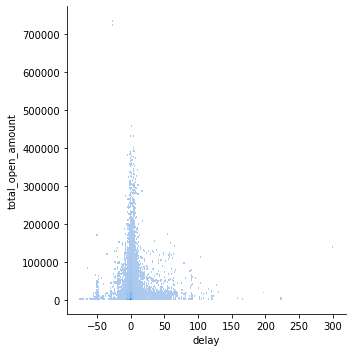

In [ ]:
# Plotting the Graph Between delay and total open amount

sns.displot(data=train, x="delay", y="total_open_amount")

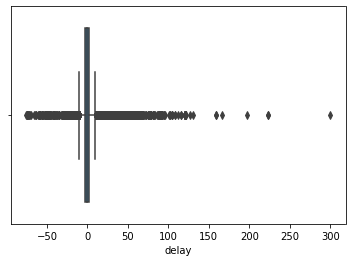

In [ ]:
# Plotting Box plot to Check for Outliers

sns.boxplot(train.delay)

In [ ]:
#removing outliers

train.drop(train[train['delay'] >= 150].index, inplace=True )

In [ ]:
# Deletion of Amonalous Columns

train.drop(train[train['due_in_date'] < train['posting_date']].index, inplace=True )

In [ ]:
# Converting the Currency so as to keep it in one Currency

train['total_open_amount'] = np.where(train.invoice_currency == 'CAD', 0.78 * train['total_open_amount'],train['total_open_amount'])

In [ ]:
# plotting dis plot to check the distribution of total open amount

sns.displot(data=train, x="total_open_amount", height = 50 , aspect = 5 )

In [ ]:
train["total_open_amount"].value_counts()

1897.50     83
1898.20     66
471.56      58
1328.25     46
2373.96     45
            ..
17200.27     1
9103.70      1
57261.22     1
66.24        1
176.00       1
Name: total_open_amount, Length: 29767, dtype: int64

In [ ]:
len(train)

32676

In [ ]:
# Removing the outliers where total open amount is less than 1000 USD

train.drop(train[train['total_open_amount'] <= 1000].index, inplace=True )

In [ ]:
train["total_open_amount"].value_counts()

1897.50      83
1898.20      66
1328.25      46
2373.96      45
6532.60      34
             ..
32741.85      1
115698.24     1
49181.10      1
32979.42      1
7530.89       1
Name: total_open_amount, Length: 26741, dtype: int64

In [ ]:
max = train["total_open_amount"].max()
print(max)

735251.64


In [ ]:
min = train["total_open_amount"].min()
print(min)

1000.84


In [ ]:
len(train)

28902

In [ ]:
train

,total_open_amount,business_code,invoice_currency,cust_payment_terms,clear_date,posting_date,document_create_date.1,due_in_date,baseline_create_date,delay
11418,9398.57,U001,USD,NAA8,2019-01-12,2018-12-30,2018-12-30,2019-01-14,2018-12-30,-2
24215,17707.30,U001,USD,NAH4,2019-01-11,2018-12-30,2018-12-30,2019-01-14,2018-12-30,-3
9514,22221.15,U001,USD,NAH4,2019-01-10,2018-12-30,2018-12-30,2019-01-14,2018-12-30,-4
45305,35118.85,U001,USD,NAA8,2019-01-22,2018-12-30,2018-12-30,2019-01-14,2018-12-30,8
22406,20417.83,U001,USD,NAH4,2019-01-09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,-5
...,...,...,...,...,...,...,...,...,...,...
35207,6780.20,U001,USD,NAWU,2019-11-27,2019-10-18,2019-10-18,2019-11-27,2019-10-18,0
13656,18771.48,U001,USD,NAC6,2019-11-04,2019-10-18,2019-10-18,2019-11-02,2019-10-18,2
22022,2835.34,U001,USD,NAM4,2019-11-01,2019-10-18,2019-10-18,2019-11-08,2019-10-16,-7
12675,23095.93,U001,USD,NAA8,2019-11-22,2019-10-18,2019-10-18,2019-11-02,2019-10-18,20


Feature Creation/Building

---

---





In [ ]:
# Creating Features in train from due Date

train['due_month'] = train.due_in_date.dt.month
train['due_quarter'] = train.due_in_date.dt.quarter

In [ ]:
train["due_month"].nunique()

12

In [ ]:
train["due_quarter"].nunique()

4

In [ ]:
# Features Cannot be created with Target columns

"""train['check'] = (train['due_in_date'] - train['document_create_date.1'])
train.check =  train.check.dt.days
train.head(5)"""

"train['check'] = (train['due_in_date'] - train['document_create_date.1'])\ntrain.check =  train.check.dt.days\ntrain.head(5)"

In [ ]:
# train["check"].value_counts()


In [ ]:
# Creating a new Feature date salb

train['date_slab'] = train['due_in_date'] - train['posting_date']
train.date_slab = train.date_slab.dt.days 

In [ ]:
train["date_slab"].value_counts()

15     21383
10       766
11       749
20       687
35       625
32       512
0        503
65       480
30       466
18       289
12       272
45       260
19       202
17       192
16       183
60       165
34       145
14       125
90       103
40        91
13        87
5         66
21        62
3         60
4         59
31        56
1         45
75        43
2         38
7         32
6         32
8         29
36        14
28        12
22        12
56        10
9          9
37         6
120        6
25         6
66         3
27         3
43         2
33         2
23         2
29         2
113        1
41         1
52         1
112        1
44         1
38         1
Name: date_slab, dtype: int64

In [ ]:
train["date_slab"].nunique()

52

In [ ]:
train["delay"].nunique()

157

In [ ]:
# Binning total open amount to create Features

bin_ranges=[1000,2000,4000,8000,16000,32000,64000,150000,300000,800000]
bin_names=[1,2,3,4,5,6,7,8,9,]
train['bin_total_open_amount'] = pd.cut( np.array(train['total_open_amount']),bins=bin_ranges)
train['bin_total_open_amount'] = pd.cut( np.array(train['total_open_amount']),bins=bin_ranges, labels=bin_names)

In [ ]:
train['bin_total_open_amount'].value_counts()

6    6132
5    5853
4    5136
7    4435
3    2896
2    2172
1    1839
8     428
9      11
Name: bin_total_open_amount, dtype: int64

In [ ]:
train['date_slab'].value_counts()

15     21383
10       766
11       749
20       687
35       625
32       512
0        503
65       480
30       466
18       289
12       272
45       260
19       202
17       192
16       183
60       165
34       145
14       125
90       103
40        91
13        87
5         66
21        62
3         60
4         59
31        56
1         45
75        43
2         38
7         32
6         32
8         29
36        14
28        12
22        12
56        10
9          9
37         6
120        6
25         6
66         3
27         3
43         2
33         2
23         2
29         2
113        1
41         1
52         1
112        1
44         1
38         1
Name: date_slab, dtype: int64

In [ ]:
# Binning date Slab to create features

bin_ranges=[0,10,20,30,40,50,60,70,120]
bin_names=[1,2,3,4,5,6,7,8,]
train['bin_date_slab'] = pd.cut( np.array(train['date_slab']),bins=bin_ranges)
train['bin_date_slab'] = pd.cut( np.array(train['date_slab']),bins=bin_ranges, labels=bin_names)

In [ ]:
train['bin_date_slab'].value_counts()

2    24169
4     1452
1     1136
3      565
7      483
5      264
6      176
8      154
Name: bin_date_slab, dtype: int64

In [ ]:
train

,total_open_amount,business_code,invoice_currency,cust_payment_terms,clear_date,posting_date,document_create_date.1,due_in_date,baseline_create_date,delay,due_month,due_quarter,date_slab,bin_total_open_amount,bin_date_slab
11418,9398.57,U001,USD,NAA8,2019-01-12,2018-12-30,2018-12-30,2019-01-14,2018-12-30,-2,1,1,15,4,2
24215,17707.30,U001,USD,NAH4,2019-01-11,2018-12-30,2018-12-30,2019-01-14,2018-12-30,-3,1,1,15,5,2
9514,22221.15,U001,USD,NAH4,2019-01-10,2018-12-30,2018-12-30,2019-01-14,2018-12-30,-4,1,1,15,5,2
45305,35118.85,U001,USD,NAA8,2019-01-22,2018-12-30,2018-12-30,2019-01-14,2018-12-30,8,1,1,15,6,2
22406,20417.83,U001,USD,NAH4,2019-01-09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,-5,1,1,15,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35207,6780.20,U001,USD,NAWU,2019-11-27,2019-10-18,2019-10-18,2019-11-27,2019-10-18,0,11,4,40,3,4
13656,18771.48,U001,USD,NAC6,2019-11-04,2019-10-18,2019-10-18,2019-11-02,2019-10-18,2,11,4,15,5,2
22022,2835.34,U001,USD,NAM4,2019-11-01,2019-10-18,2019-10-18,2019-11-08,2019-10-16,-7,11,4,21,2,3
12675,23095.93,U001,USD,NAA8,2019-11-22,2019-10-18,2019-10-18,2019-11-02,2019-10-18,20,11,4,15,5,2


Encoding the non numeric columns

---



In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28902 entries, 11418 to 11019
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_open_amount       28902 non-null  float64       
 1   business_code           28902 non-null  object        
 2   invoice_currency        28902 non-null  object        
 3   cust_payment_terms      28902 non-null  object        
 4   clear_date              28902 non-null  datetime64[ns]
 5   posting_date            28902 non-null  datetime64[ns]
 6   document_create_date.1  28902 non-null  datetime64[ns]
 7   due_in_date             28902 non-null  datetime64[ns]
 8   baseline_create_date    28902 non-null  datetime64[ns]
 9   delay                   28902 non-null  int64         
 10  due_month               28902 non-null  int64         
 11  due_quarter             28902 non-null  int64         
 12  date_slab               28902 non-null  in

In [ ]:
# Converting object type to Category type 

train['business_code'] = train.business_code.astype('category')
train['invoice_currency'] = train.invoice_currency.astype('category')
train['cust_payment_terms'] = train.cust_payment_terms.astype('category')

In [ ]:
# Encoding category to integer

train.business_code = train.business_code.cat.codes
train.invoice_currency = train.invoice_currency.cat.codes
train.cust_payment_terms = train.cust_payment_terms.cat.codes

In [ ]:
train['cust_payment_terms'].value_counts()

19    11424
32     7502
6      2392
24     1032
21      809
      ...  
55        1
41        1
29        1
46        1
0         1
Name: cust_payment_terms, Length: 61, dtype: int64

In [ ]:
max = train["cust_payment_terms"].max()
print(max)

60


In [ ]:
min = train["cust_payment_terms"].min()
print(min)

0


In [ ]:
# binning costomer payment terms to enhance usability 

bin_ranges=[0,10,20,30,40,50,60,70,80,120]
bin_names=[1,2,3,4,5,6,7,8,9,]
train['bin_cust_payment_terms'] = pd.cut( np.array(train['cust_payment_terms']),bins=bin_ranges)
train['bin_cust_payment_terms'] = pd.cut( np.array(train['cust_payment_terms']),bins=bin_ranges, labels=bin_names)

In [ ]:
#train['bin_total_open_amount'] = train.bin_total_open_amount.astype(int)
#train['bin_date_slab'] = train.cust_payment_terms.astype(int)

In [ ]:
train.head()

,total_open_amount,business_code,invoice_currency,cust_payment_terms,clear_date,posting_date,document_create_date.1,due_in_date,baseline_create_date,delay,due_month,due_quarter,date_slab,bin_total_open_amount,bin_date_slab,bin_cust_payment_terms
11418,9398.57,1,1,19,2019-01-12,2018-12-30,2018-12-30,2019-01-14,2018-12-30,-2,1,1,15,4,2,2
24215,17707.30,1,1,32,2019-01-11,2018-12-30,2018-12-30,2019-01-14,2018-12-30,-3,1,1,15,5,2,4
9514,22221.15,1,1,32,2019-01-10,2018-12-30,2018-12-30,2019-01-14,2018-12-30,-4,1,1,15,5,2,4
45305,35118.85,1,1,19,2019-01-22,2018-12-30,2018-12-30,2019-01-14,2018-12-30,8,1,1,15,6,2,2
22406,20417.83,1,1,32,2019-01-09,2018-12-30,2018-12-30,2019-01-14,2018-12-30,-5,1,1,15,5,2,4


In [ ]:
# Dropping date time columns

train.drop(['clear_date','posting_date',"document_create_date.1","due_in_date","baseline_create_date"], axis  = 1, inplace = True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28902 entries, 11418 to 11019
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   total_open_amount       28902 non-null  float64 
 1   business_code           28902 non-null  int8    
 2   invoice_currency        28902 non-null  int8    
 3   cust_payment_terms      28902 non-null  int8    
 4   delay                   28902 non-null  int64   
 5   due_month               28902 non-null  int64   
 6   due_quarter             28902 non-null  int64   
 7   date_slab               28902 non-null  int64   
 8   bin_total_open_amount   28902 non-null  category
 9   bin_date_slab           28399 non-null  category
 10  bin_cust_payment_terms  28901 non-null  category
dtypes: category(3), float64(1), int64(4), int8(3)
memory usage: 1.5 MB


In [ ]:
train.head()

,total_open_amount,business_code,invoice_currency,cust_payment_terms,delay,due_month,due_quarter,date_slab,bin_total_open_amount,bin_date_slab,bin_cust_payment_terms
11418,9398.57,1,1,19,-2,1,1,15,4,2,2
24215,17707.30,1,1,32,-3,1,1,15,5,2,4
9514,22221.15,1,1,32,-4,1,1,15,5,2,4
45305,35118.85,1,1,19,8,1,1,15,6,2,2
22406,20417.83,1,1,32,-5,1,1,15,5,2,4


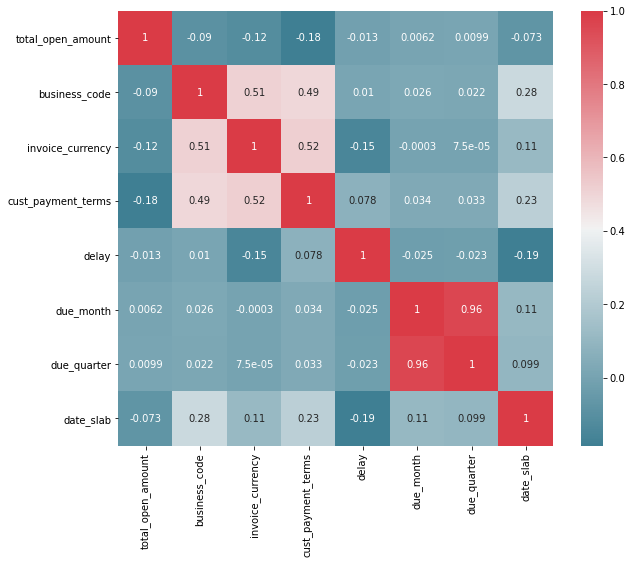

In [ ]:
# Plotting Heatmap To check Corelation

f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),cmap=sns.diverging_palette(220, 10, as_cmap=True), square=True, ax=ax, annot=True)
plt.show()

Feature Selection


---

---





In [ ]:
# Checking Corelation of numeric columns
train.corr().loc['delay',:]

total_open_amount    -0.012611
business_code         0.010364
invoice_currency     -0.146421
cust_payment_terms    0.077873
delay                 1.000000
due_month            -0.025099
due_quarter          -0.023142
date_slab            -0.185872
Name: delay, dtype: float64

In [ ]:
# Funtion to clean the dateset for Nan Values and infinite numbers and mismatch in datatype values

def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
    return df[indices_to_keep].astype(np.float64)

In [ ]:
# Calling the Cleaning Function
clean_dataset(train)

,total_open_amount,business_code,invoice_currency,cust_payment_terms,delay,due_month,due_quarter,date_slab,bin_total_open_amount,bin_date_slab,bin_cust_payment_terms
11418,9398.57,1.0,1.0,19.0,-2.0,1.0,1.0,15.0,4.0,2.0,2.0
24215,17707.30,1.0,1.0,32.0,-3.0,1.0,1.0,15.0,5.0,2.0,4.0
9514,22221.15,1.0,1.0,32.0,-4.0,1.0,1.0,15.0,5.0,2.0,4.0
45305,35118.85,1.0,1.0,19.0,8.0,1.0,1.0,15.0,6.0,2.0,2.0
22406,20417.83,1.0,1.0,32.0,-5.0,1.0,1.0,15.0,5.0,2.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...
35207,6780.20,1.0,1.0,59.0,0.0,11.0,4.0,40.0,3.0,4.0,6.0
13656,18771.48,1.0,1.0,24.0,2.0,11.0,4.0,15.0,5.0,2.0,3.0
22022,2835.34,1.0,1.0,35.0,-7.0,11.0,4.0,21.0,2.0,3.0,4.0
12675,23095.93,1.0,1.0,19.0,20.0,11.0,4.0,15.0,5.0,2.0,2.0


In [ ]:
train.reset_index(drop=True,inplace=True)

In [ ]:
# Separating the target Column from train Set
target = train[['delay']]

In [ ]:
# Dropping the Target column in train set

train.drop('delay', axis = 1, inplace = True)

In [ ]:
train.reset_index(drop=True,inplace=True)

In [ ]:
# Function for feature Selection Based on Corelation
def cor(dataset,thres):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > thres:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

In [ ]:
# Setting Threshold value for feature Selection

corr_features = cor(train, 0.8)
len(corr_features)

1

In [ ]:
corr_features

{'due_quarter'}

In [ ]:
# Dropping Columns that shows poor Features

train.drop(labels=corr_features, axis = 1, inplace= True)

In [ ]:
train.reset_index(drop=True,inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28398 entries, 0 to 28397
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   total_open_amount       28398 non-null  float64 
 1   business_code           28398 non-null  int8    
 2   invoice_currency        28398 non-null  int8    
 3   cust_payment_terms      28398 non-null  int8    
 4   due_month               28398 non-null  int64   
 5   date_slab               28398 non-null  int64   
 6   bin_total_open_amount   28398 non-null  category
 7   bin_date_slab           28398 non-null  category
 8   bin_cust_payment_terms  28398 non-null  category
dtypes: category(3), float64(1), int64(2), int8(3)
memory usage: 833.2 KB


CREATING FEATURES FOR VALIDATION SET 1 AND VALIDATION SET 2 AND TEST

---



In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4619 entries, 48205 to 47276
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_open_amount       4619 non-null   float64       
 1   business_code           4619 non-null   object        
 2   invoice_currency        4619 non-null   object        
 3   cust_payment_terms      4619 non-null   object        
 4   clear_date              0 non-null      datetime64[ns]
 5   posting_date            4619 non-null   datetime64[ns]
 6   document_create_date.1  4619 non-null   datetime64[ns]
 7   due_in_date             4619 non-null   datetime64[ns]
 8   baseline_create_date    4619 non-null   datetime64[ns]
dtypes: datetime64[ns](5), float64(1), object(3)
memory usage: 360.9+ KB


In [ ]:
# Replicating Features on validation sets and test set
val1['due_month'] = val1.due_in_date.dt.month
val2['due_month'] = val2.due_in_date.dt.month
test['due_month'] = test.due_in_date.dt.month

In [ ]:
# Currency conversion from CAD to USD
val1['total_open_amount'] = np.where(val1.invoice_currency == 'CAD', 0.78 * val1['total_open_amount'],val1['total_open_amount'])
val2['total_open_amount'] = np.where(val2.invoice_currency == 'CAD', 0.78 * val2['total_open_amount'],val2['total_open_amount'])
test['total_open_amount'] = np.where(test.invoice_currency == 'CAD', 0.78 * test['total_open_amount'],test['total_open_amount'])

In [ ]:
val1['date_slab'] = val1['due_in_date'] - val1['posting_date']
val1.date_slab = val1.date_slab.dt.days 
val2['date_slab'] = val2['due_in_date'] - val2['posting_date']
val2.date_slab = val2.date_slab.dt.days 
test['date_slab'] = test['due_in_date'] - test['posting_date']
test.date_slab = test.date_slab.dt.days 

Binning all the features in validation and test  

---



In [ ]:
bin_ranges=[1000,2000,4000,8000,16000,32000,64000,150000,300000,800000]
bin_names=[1,2,3,4,5,6,7,8,9,]
val1['bin_total_open_amount'] = pd.cut( np.array(val1['total_open_amount']),bins=bin_ranges)
val1['bin_total_open_amount'] = pd.cut( np.array(val1['total_open_amount']),bins=bin_ranges, labels=bin_names)
val2['bin_total_open_amount'] = pd.cut( np.array(val2['total_open_amount']),bins=bin_ranges)
val2['bin_total_open_amount'] = pd.cut( np.array(val2['total_open_amount']),bins=bin_ranges, labels=bin_names)
test['bin_total_open_amount'] = pd.cut( np.array(test['total_open_amount']),bins=bin_ranges)
test['bin_total_open_amount'] = pd.cut( np.array(test['total_open_amount']),bins=bin_ranges, labels=bin_names)

In [ ]:
bin_ranges=[0,10,20,30,40,50,60,70,120]
bin_names=[1,2,3,4,5,6,7,8,]
val1['bin_date_slab'] = pd.cut( np.array(val1['date_slab']),bins=bin_ranges)
val1['bin_date_slab'] = pd.cut( np.array(val1['date_slab']),bins=bin_ranges, labels=bin_names)
val2['bin_date_slab'] = pd.cut( np.array(val2['date_slab']),bins=bin_ranges)
val2['bin_date_slab'] = pd.cut( np.array(val2['date_slab']),bins=bin_ranges, labels=bin_names)
test['bin_date_slab'] = pd.cut( np.array(test['date_slab']),bins=bin_ranges)
test['bin_date_slab'] = pd.cut( np.array(test['date_slab']),bins=bin_ranges, labels=bin_names)

DataType Conversion and Encoding

---



In [ ]:
val1['business_code'] = train.business_code.astype('category')
val1['invoice_currency'] = train.invoice_currency.astype('category')
val1['cust_payment_terms'] = train.cust_payment_terms.astype('category')
val2['business_code'] = val2.business_code.astype('category')
val2['invoice_currency'] = val2.invoice_currency.astype('category')
val2['cust_payment_terms'] = val2.cust_payment_terms.astype('category')
test['business_code'] = test.business_code.astype('category')
test['invoice_currency'] = test.invoice_currency.astype('category')
test['cust_payment_terms'] = test.cust_payment_terms.astype('category')

In [ ]:
val1.business_code = val1.business_code.cat.codes
val1.invoice_currency = val1.invoice_currency.cat.codes
val1.cust_payment_terms = val1.cust_payment_terms.cat.codes
val2.business_code = val2.business_code.cat.codes
val2.invoice_currency = val2.invoice_currency.cat.codes
val2.cust_payment_terms = val2.cust_payment_terms.cat.codes
test.business_code = test.business_code.cat.codes
test.invoice_currency = test.invoice_currency.cat.codes
test.cust_payment_terms = test.cust_payment_terms.cat.codes

In [ ]:
bin_ranges=[0,10,20,30,40,50,60,70,80,120]
bin_names=[1,2,3,4,5,6,7,8,9,]
val1['bin_cust_payment_terms'] = pd.cut( np.array(val1['cust_payment_terms']),bins=bin_ranges)
val1['bin_cust_payment_terms'] = pd.cut( np.array(val1['cust_payment_terms']),bins=bin_ranges, labels=bin_names)
val2['bin_cust_payment_terms'] = pd.cut( np.array(val2['cust_payment_terms']),bins=bin_ranges)
val2['bin_cust_payment_terms'] = pd.cut( np.array(val2['cust_payment_terms']),bins=bin_ranges, labels=bin_names)
test['bin_cust_payment_terms'] = pd.cut( np.array(test['cust_payment_terms']),bins=bin_ranges)
test['bin_cust_payment_terms'] = pd.cut( np.array(test['cust_payment_terms']),bins=bin_ranges, labels=bin_names)

In [ ]:
test.reset_index(drop=True,inplace=True)

Creating a Result data Frame to store due in date before Dropping for further addition to delay

---



In [ ]:
result = pd.DataFrame()

In [ ]:
result[["due_date"]] = test[["due_in_date"]]

In [ ]:
result.reset_index(drop=True,inplace=True)

In [ ]:
result["due_date"]

0      2020-05-02
1      2020-03-09
2      2020-03-13
3      2020-04-27
4      2020-03-13
          ...    
4614   2020-05-24
4615   2020-06-02
4616   2020-06-03
4617   2020-06-20
4618   2020-06-01
Name: due_date, Length: 4619, dtype: datetime64[ns]

Dropping and cleaning data from validation and test

---



In [ ]:
val1.drop(['clear_date','posting_date',"document_create_date.1","due_in_date","baseline_create_date"], axis  = 1, inplace = True)
val2.drop(['clear_date','posting_date',"document_create_date.1","due_in_date","baseline_create_date"], axis  = 1, inplace = True)
test.drop(['clear_date','posting_date',"document_create_date.1","due_in_date","baseline_create_date"], axis  = 1, inplace = True)

In [ ]:
clean_dataset(val1)
clean_dataset(val2)
clean_dataset(test)

,total_open_amount,business_code,invoice_currency,cust_payment_terms,due_month,date_slab,bin_total_open_amount,bin_date_slab,bin_cust_payment_terms
0,4439.5500,1.0,1.0,22.0,5.0,65.0,3.0,7.0,3.0
1,121299.0168,0.0,0.0,1.0,3.0,11.0,7.0,2.0,1.0
2,4343.6500,1.0,1.0,10.0,3.0,15.0,3.0,2.0,1.0
3,17946.0100,1.0,1.0,33.0,4.0,60.0,5.0,6.0,4.0
4,62422.7500,1.0,1.0,10.0,3.0,15.0,6.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...
4611,3434.1606,0.0,0.0,1.0,5.0,14.0,2.0,2.0,1.0
4613,6000.0000,1.0,1.0,10.0,5.0,15.0,3.0,2.0,1.0
4614,2925.6474,0.0,0.0,1.0,5.0,10.0,2.0,1.0,1.0
4615,9291.0000,1.0,1.0,10.0,6.0,15.0,4.0,2.0,1.0


In [ ]:
val1.reset_index(drop=True,inplace=True)
val2.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)

Creating target variable for validation sets

---



In [ ]:
target_val1 = val1[['delay']]
target_val2 = val2[['delay']]

In [ ]:
val1.drop('delay', axis = 1, inplace = True)
val2.drop('delay', axis = 1, inplace = True)

In [ ]:
val1.reset_index(drop=True,inplace=True)
val2.reset_index(drop=True,inplace=True)


In [ ]:
val1

,total_open_amount,business_code,invoice_currency,cust_payment_terms,due_month,date_slab,bin_total_open_amount,bin_date_slab,bin_cust_payment_terms
0,3518.00,1,1,17,12,15,2,2,2
1,20541.02,1,1,17,12,15,5,2,2
2,15395.59,1,1,17,12,15,4,2,2
3,7958.25,1,1,29,12,15,3,2,3
4,97337.03,1,1,19,12,15,7,2,2
...,...,...,...,...,...,...,...,...,...
3686,84202.93,1,1,19,3,15,7,2,2
3687,34578.99,1,1,17,3,15,6,2,2
3688,76194.86,1,1,23,3,15,7,2,3
3689,71300.88,1,1,29,4,35,7,4,3


In [ ]:
val2

,total_open_amount,business_code,invoice_currency,cust_payment_terms,due_month,date_slab,bin_total_open_amount,bin_date_slab,bin_cust_payment_terms
0,122284.55,3,1,32,11,30,7,3,4
1,1819.84,1,1,10,11,15,1,2,1
2,435506.38,1,1,22,10,5,9,1,3
3,61045.16,1,1,10,11,15,6,2,1
4,32715.47,1,1,12,11,15,6,2,2
...,...,...,...,...,...,...,...,...,...
5115,31019.72,1,1,16,12,20,5,2,2
5116,47307.24,1,1,21,12,15,6,2,3
5117,18196.20,1,1,21,12,15,5,2,3
5118,32363.40,1,1,21,12,15,6,2,3


In [ ]:
test

,total_open_amount,business_code,invoice_currency,cust_payment_terms,due_month,date_slab,bin_total_open_amount,bin_date_slab,bin_cust_payment_terms
0,4439.5500,1,1,22,5,65,3,7,3
1,121299.0168,0,0,1,3,11,7,2,1
2,4343.6500,1,1,10,3,15,3,2,1
3,17946.0100,1,1,33,4,60,5,6,4
4,62422.7500,1,1,10,3,15,6,2,1
...,...,...,...,...,...,...,...,...,...
4093,3434.1606,0,0,1,5,14,2,2,1
4094,6000.0000,1,1,10,5,15,3,2,1
4095,2925.6474,0,0,1,5,10,2,1,1
4096,9291.0000,1,1,10,6,15,4,2,1


Linear Regression

---



In [ ]:
lr = LinearRegression()
lr.fit(train, target)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Training Scores

---



In [ ]:
predict = lr.predict(train)
MSE = mean_squared_error(target, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(target, predict)
SCORE = lr.score(train, target)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

77.36696919124682 
 8.795849543463486 
 0.10396643293324381 
 0.10396643293324381 



validation Scores

---



In [ ]:
predict = lr.predict(val1)
MSE = mean_squared_error(target_val1, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(target_val1, predict)
SCORE = lr.score(val1, target_val1)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

75.26220092006851 
 8.675379007286569 
 -0.04825242145146569 
 -0.04825242145146569 



In [ ]:
predict = lr.predict(val2)
MSE = mean_squared_error(target_val2, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(target_val2, predict)
SCORE = lr.score(val2, target_val2)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

19.950084066585042 
 4.466551697516222 
 0.15310584728783527 
 0.15310584728783527 



Decision Tree Regressor

---



In [ ]:
dtr = DecisionTreeRegressor()
dtr.fit(train, target)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Traing Score

---



In [ ]:
predict = dtr.predict(train)
MSE = mean_squared_error(target, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(target, predict)
SCORE = dtr.score(train, target)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

1.826731390234827 
 1.3515662729717797 
 0.9788435211980604 
 0.9788435211980604 



Validation Score

---



In [ ]:
predict = dtr.predict(val1)
MSE = mean_squared_error(target_val1, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(target_val1, predict)
SCORE = dtr.score(val1, target_val1)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

707.3223456455644 
 26.595532437715256 
 -8.851590207375754 
 -8.851590207375754 



In [ ]:
predict = dtr.predict(val2)
MSE = mean_squared_error(target_val2, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(target_val2, predict)
SCORE = dtr.score(val2, target_val2)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

103.09613324652778 
 10.153626605628542 
 -3.3764984709993824 
 -3.3764984709993824 



Random Forest Regressor

---



In [ ]:
rf = RandomForestRegressor(n_estimators= 100, random_state= 10)
rf.fit(train, target)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

Traning Score

---



In [ ]:
predict = rf.predict(train)
MSE = mean_squared_error(target, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(target, predict)
SCORE = rf.score(train, target)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

12.304038349811997 
 3.5077112694479284 
 0.857499505445852 
 0.857499505445852 



Validation Score

---



In [ ]:
predict = rf.predict(val1)
MSE = mean_squared_error(target_val1, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(target_val1, predict)
SCORE = rf.score(val1, target_val1)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

251.16143231936948 
 15.848073457659435 
 -2.4981780546600283 
 -2.4981780546600283 



In [ ]:
predict = rf.predict(val2)
MSE = mean_squared_error(target_val2, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(target_val2, predict)
SCORE = rf.score(val2, target_val2)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

47.06199996853617 
 6.860174922590252 
 -0.9978127638594863 
 -0.9978127638594863 



Support Vector Regressor

---



In [ ]:
sr = SVR()
sr.fit(train, target)
predict = sr.predict(train)

Training Score

---



In [ ]:
predict = sr.predict(train)
MSE = mean_squared_error(target, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(target, predict)
SCORE = sr.score(train, target)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

86.44554577233765 
 9.297609680575844 
 -0.001178042065317797 
 -0.001178042065317797 



Validation Scores

---



In [ ]:
predict = sr.predict(val1)
MSE = mean_squared_error(target_val1, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(target_val1, predict)
SCORE = sr.score(val1, target_val1)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

71.77738686305405 
 8.472153614226672 
 0.000284091285560395 
 0.000284091285560395 



In [ ]:
predict = sr.predict(val2)
MSE = mean_squared_error(target_val2, predict)
RMSE = np.sqrt(MSE)
R2_SCORE = r2_score(target_val2, predict)
SCORE = sr.score(val2, target_val2)
print(MSE, '\n',RMSE, '\n' ,R2_SCORE, '\n', SCORE, '\n')

23.53782308664896 
 4.851579442475302 
 0.000803972899317551 
 0.000803972899317551 



Predicting the Delay Results

---

---





In [ ]:
test.reset_index(drop=True,inplace=True)

Using Random Forest Regressor 

---



In [ ]:
predict =rf.predict(test)

In [ ]:
# Predicting the Final Delay Scores

result["delay"] = pd.DataFrame(predict, columns=['delay'])

In [ ]:
result.dropna(inplace = True)

In [ ]:
result.reset_index(drop=True,inplace=True)

In [ ]:
result.head()

,due_date,delay
0,2020-05-02,1.310
1,2020-03-09,11.860
2,2020-03-13,22.520
3,2020-04-27,-6.430
4,2020-03-13,1.414


In [ ]:
result["delay"]

0        1.310000
1       11.860000
2       22.520000
3       -6.430000
4        1.414000
          ...    
4093    16.920000
4094     5.880000
4095     8.686667
4096     2.860000
4097     4.395833
Name: delay, Length: 4098, dtype: float64

In [ ]:
min = result["delay"].min()
max = result["delay"].max()
print(min, '\n' , max , '\n')

-16.66 
 79.47 



In [ ]:
# Bucketing Delay into various Buckets

bin_ranges=[-80,15,30,45,60,130]
bin_names=["bucket_1","bucket_2","bucket_3","bucket_4","bucket_5",]
result['bin_delay'] = pd.cut( np.array(result['delay']),bins=bin_ranges)
result['bin_delay'] = pd.cut( np.array(result['delay']),bins=bin_ranges, labels=bin_names)


In [ ]:
result["bin_delay"]

0       bucket_1
1       bucket_1
2       bucket_2
3       bucket_1
4       bucket_1
          ...   
4093    bucket_2
4094    bucket_1
4095    bucket_1
4096    bucket_1
4097    bucket_1
Name: bin_delay, Length: 4098, dtype: category
Categories (5, object): ['bucket_1' < 'bucket_2' < 'bucket_3' < 'bucket_4' < 'bucket_5']

In [ ]:
result["delay"]

0        1.310000
1       11.860000
2       22.520000
3       -6.430000
4        1.414000
          ...    
4093    16.920000
4094     5.880000
4095     8.686667
4096     2.860000
4097     4.395833
Name: delay, Length: 4098, dtype: float64

In [ ]:
# converting Delay to date and time format for addtion

temp = result['delay'].apply(lambda x: pd.Timedelta(x, unit='D'))
result['predicted_clear_date'] = result['due_date'] + temp

Final Prediction results of Clear Date and Delay Buckets

---



In [ ]:
result

,due_date,delay,bin_delay,predicted_clear_date
0,2020-05-02,1.310000,bucket_1,2020-05-03 07:26:24.000000000
1,2020-03-09,11.860000,bucket_1,2020-03-20 20:38:24.000000000
2,2020-03-13,22.520000,bucket_2,2020-04-04 12:28:48.000000000
3,2020-04-27,-6.430000,bucket_1,2020-04-20 13:40:48.000000000
4,2020-03-13,1.414000,bucket_1,2020-03-14 09:56:09.600000000
...,...,...,...,...
4093,2020-05-15,16.920000,bucket_2,2020-05-31 22:04:48.000000000
4094,2020-05-20,5.880000,bucket_1,2020-05-25 21:07:12.000000000
4095,2020-05-15,8.686667,bucket_1,2020-05-23 16:28:48.000028800
4096,2020-05-15,2.860000,bucket_1,2020-05-17 20:38:24.000000000
